In [1]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define paths to the saved data
output_dir = "../../../Datasets/12-lead electrocardiogram database/FirstRevFull5000Sample"
train_data_file = os.path.join(output_dir, "X_train.txt")
train_labels_file = os.path.join(output_dir, "y_train.txt")
test_data_file = os.path.join(output_dir, "X_test.txt")
test_labels_file = os.path.join(output_dir, "y_test.txt")


# Load data from text files
def load_split(data_file, labels_file):
    data = []
    labels = []

    # Load data
    with open(data_file, "r") as f_data:
        for line in f_data:
            data.append(np.array(line.strip().split(), dtype=np.float32))

    # Load labels
    with open(labels_file, "r") as f_labels:
        for line in f_labels:
            labels.append(line.strip())

    return np.array(data), np.array(labels)


# Load the train and test data
X_train, y_train = load_split(train_data_file, train_labels_file)
X_test, y_test = load_split(test_data_file, test_labels_file)

2024-11-08 19:54:47.141381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 19:54:47.152371: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 19:54:47.155857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 19:54:47.165050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-08 19:54:47.671473: W tensorflow/compiler/tf2

Train data shape: (7984, 60000)
Test data shape: (2662, 60000)


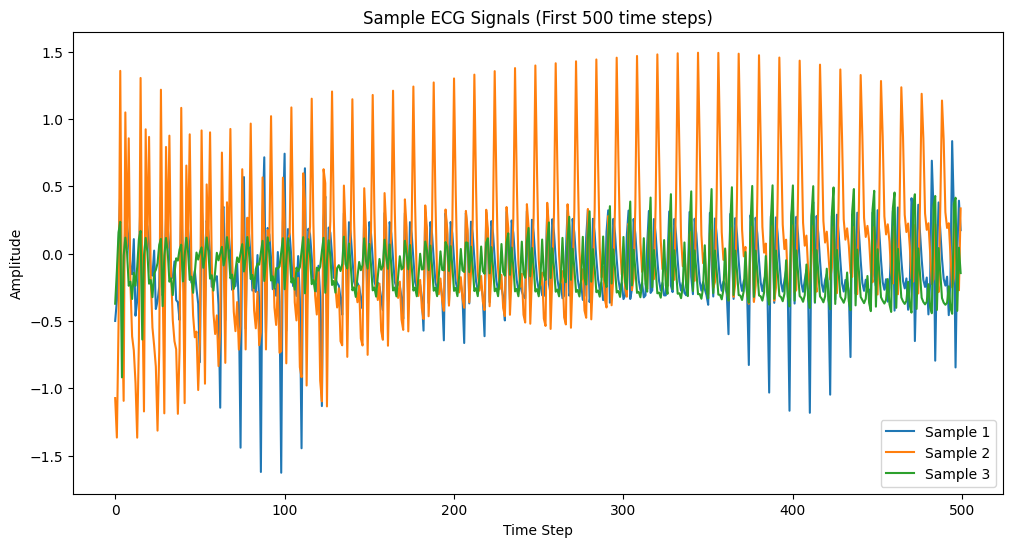

In [2]:
# Visualize some data points and distribution
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Display sample ECG signals
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(X_train[i, :500], label=f"Sample {i + 1}")
plt.title("Sample ECG Signals (First 500 time steps)")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [3]:
# Display class distribution in training set
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in training set:", class_distribution)

# Encode labels using one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the MLP model
input_shape = X_train.shape[1]
num_classes = y_train.shape[1]

mlp = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = mlp.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Generate classification report
y_pred = mlp.predict(X_test)
y_pred_labels = lb.inverse_transform(y_pred)
y_true_labels = lb.inverse_transform(y_test)
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

Class distribution in training set: {'AF': 334, 'AFIB': 1335, 'AT': 91, 'AVNRT': 12, 'AVRT': 6, 'SAAWR': 5, 'SB': 2917, 'SI': 299, 'SR': 1369, 'ST': 1176, 'SVT': 440}


/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731074216.523880  203276 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731074216.639091  203276 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731074216.

Epoch 1/10


I0000 00:00:1731074219.575416  204703 service.cc:146] XLA service 0x75dd94005940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731074219.575453  204703 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-11-08 19:56:59.606684: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-08 19:56:59.721696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 47/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0834 - loss: nan

I0000 00:00:1731074220.757192  204703 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0646 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0507 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0593 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0537 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0532 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0559 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0555 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0569 - loss: nan - val_accuracy: 0.0582 - val_loss: nan
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━

2024-11-08 19:57:11.330263: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 638880000 exceeds 10% of free system memory.
2024-11-08 19:57:11.912511: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 638880000 exceeds 10% of free system memory.


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0474 - loss: nan

Test Accuracy: 5.52%


2024-11-08 19:57:13.117196: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 638880000 exceeds 10% of free system memory.


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

          AF       0.04      1.00      0.08       111
        AFIB       0.00      0.00      0.00       445
          AT       0.00      0.00      0.00        30
       AVNRT       0.00      0.00      0.00         4
        AVRT       0.00      0.00      0.00         2
       SAAWR       0.00      0.00      0.00         2
          SB       0.00      0.00      0.00       972
          SI       0.00      0.00      0.00       100
          SR       0.00      0.00      0.00       457
          ST       0.00      0.00      0.00       392
         SVT       0.00      0.00      0.00       147

    accuracy                           0.04      2662
   macro avg       0.00      0.09      0.01      2662
weighted avg       0.00      0.04      0.00      2662



/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control